# Random Forest con clasificación
El objetivo es clasificar la calidad el vino en función de las características.
Cada árbol se entrena con todos los ejemplos pero con un subconjunto de atributos

### Carga de datos

In [20]:
import pandas as pd

csv = './data/winequality-red.csv'
data = pd.read_csv(csv)
df_wines = pd.DataFrame(data)
print(df_wines.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### Análisis exploratorio para visualizar la distribución de las clases

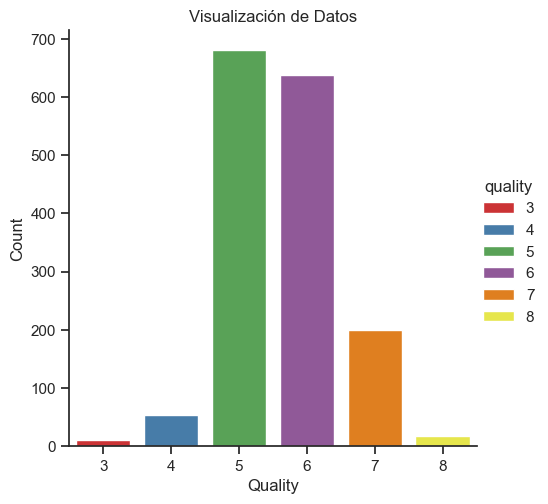

Instancias por clase
quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style='ticks') # line stlye
# kind='count' = amount of ocurrences of each class
sns.catplot(x='quality', data=df_wines, kind='count', hue='quality', palette='Set1')
plt.title("Visualización de Datos")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
print('Instancias por clase')
print(df_wines.groupby('quality').size())

### Gráfico de dispersión

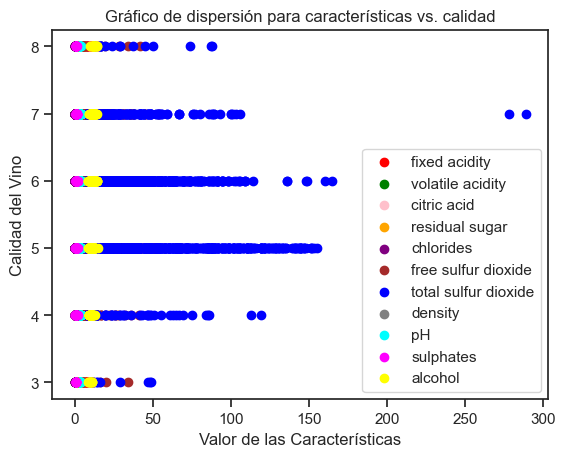

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

columns_for_scatter = df_wines.columns[:-1]

colors = ['red', 'green', 'pink', 'orange', 'purple', 'brown', 'blue', 'gray', 'cyan', 'magenta', 'yellow']
for i, column in enumerate(columns_for_scatter):
    plt.scatter(df_wines[column], df_wines['quality'], c=colors[i], label=column)

plt.xlabel('Valor de las Características')
plt.ylabel('Calidad del Vino')
plt.title('Gráfico de dispersión para características vs. calidad')

plt.legend()
plt.show()


### Selección de la variables más correlacionadas con la variable de salida

In [23]:
# Get correlations
correlation_matrix = df_wines.corr()

# Compare with target and sort them
correlation = correlation_matrix['quality']
sorted_correlations = correlation.sort_values(ascending=False)

print(sorted_correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


### Preparación de los datos para el entrenamiento

In [24]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_wines, test_size=0.2, random_state=42)

# Reset index to maintain an order
train.reset_index(inplace = True)
test.reset_index(inplace = True)

print("\nConjunto de entrenamiento:")
print('-'*35)
print(train.head())

print("\nConjunto de prueba:")
print('-'*35)
print(test.head())


Conjunto de entrenamiento:
-----------------------------------
   index  fixed acidity  volatile acidity  citric acid  residual sugar  \
0    493            8.7             0.690         0.31             3.0   
1    354            6.1             0.210         0.40             1.4   
2    342           10.9             0.390         0.47             1.8   
3    834            8.8             0.685         0.26             1.6   
4    705            8.4             1.035         0.15             6.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.086                 23.0                  81.0  1.00020  3.48   
1      0.066                 40.5                 165.0  0.99120  3.25   
2      0.118                  6.0                  14.0  0.99820  3.30   
3      0.088                 16.0                  23.0  0.99694  3.32   
4      0.073                 11.0                  54.0  0.99900  3.37   

   sulphates  alcohol  quality  
0       0.74 

### Optimización de parámetros


In [25]:
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

train = train.drop('index', axis=1)
test = test.drop('index', axis=1)

X_train = train.iloc[:, :-1]
y_train = train['quality']
X_test = test.iloc[:, :-1]
y_test = test['quality']

classificator_model = RandomForestClassifier(n_estimators=1000)

# Trainig
classificator_model.fit(X_train, y_train)

# Prediction
y_pred = classificator_model.predict(X_test)

# Accuracy. Better for classification problems
accuracy = accuracy_score(test['quality'], y_pred)
print(f'Precisión: {round(accuracy, 2)}')

# Classification Report
print("\nInforme de Clasificación:")
print(classification_report(test['quality'], y_pred))

Precisión: 0.65

Informe de Clasificación Entropía:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.70      0.75      0.73       130
           6       0.62      0.69      0.65       132
           7       0.61      0.48      0.53        42
           8       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.62      0.65      0.63       320



c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Matriz de confusion
Visuzalización de los estimadores

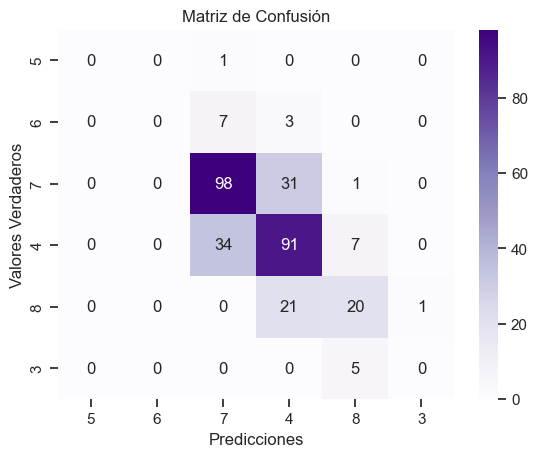

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Purples',
            xticklabels=df_wines.quality.unique(), yticklabels=df_wines.quality.unique(), fmt='d')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()